In [21]:
# Magic to automatically update imports if functions in utils are changed
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import pprint

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [92]:
stores_train = pd.read_csv("temp_data/full_features_train.csv", index_col=0)
stores_val = pd.read_csv("temp_data/full_features_val.csv", index_col=0)
stores_extra = pd.read_csv("temp_data/full_features_extra.csv", index_col=0)
stores_test = pd.read_csv("temp_data/full_features_test.csv", index_col=0)

In [93]:
stores_train.shape

(10287, 282)

In [25]:
all_cols = list(stores_train.columns)

## Info about each variable

In [95]:
stores_train["store_name"].nunique()

10265

## The plot thickens

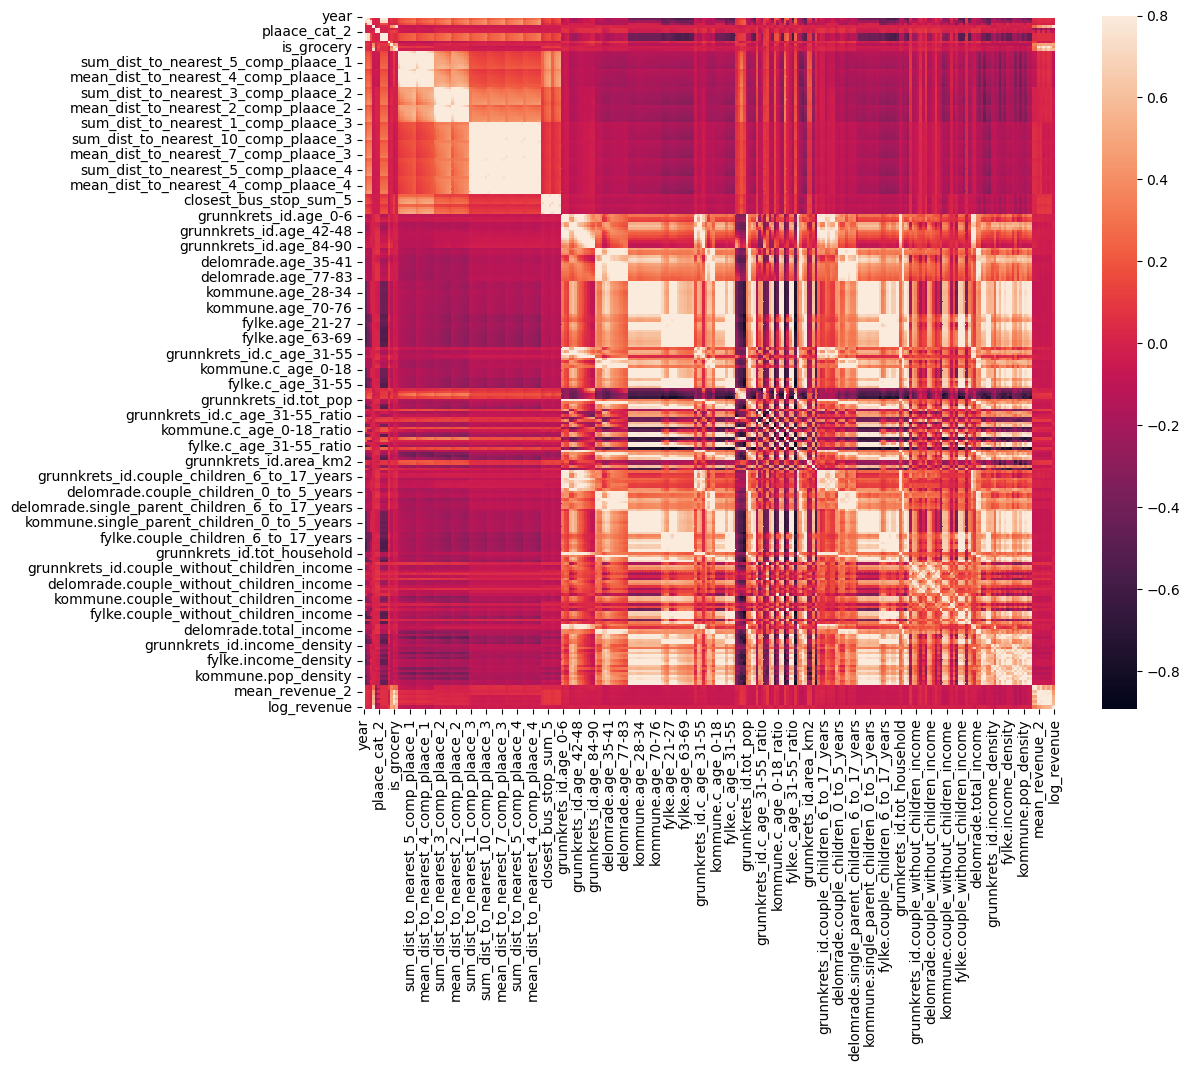

In [44]:
#correlation matrix
corrmat = stores_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

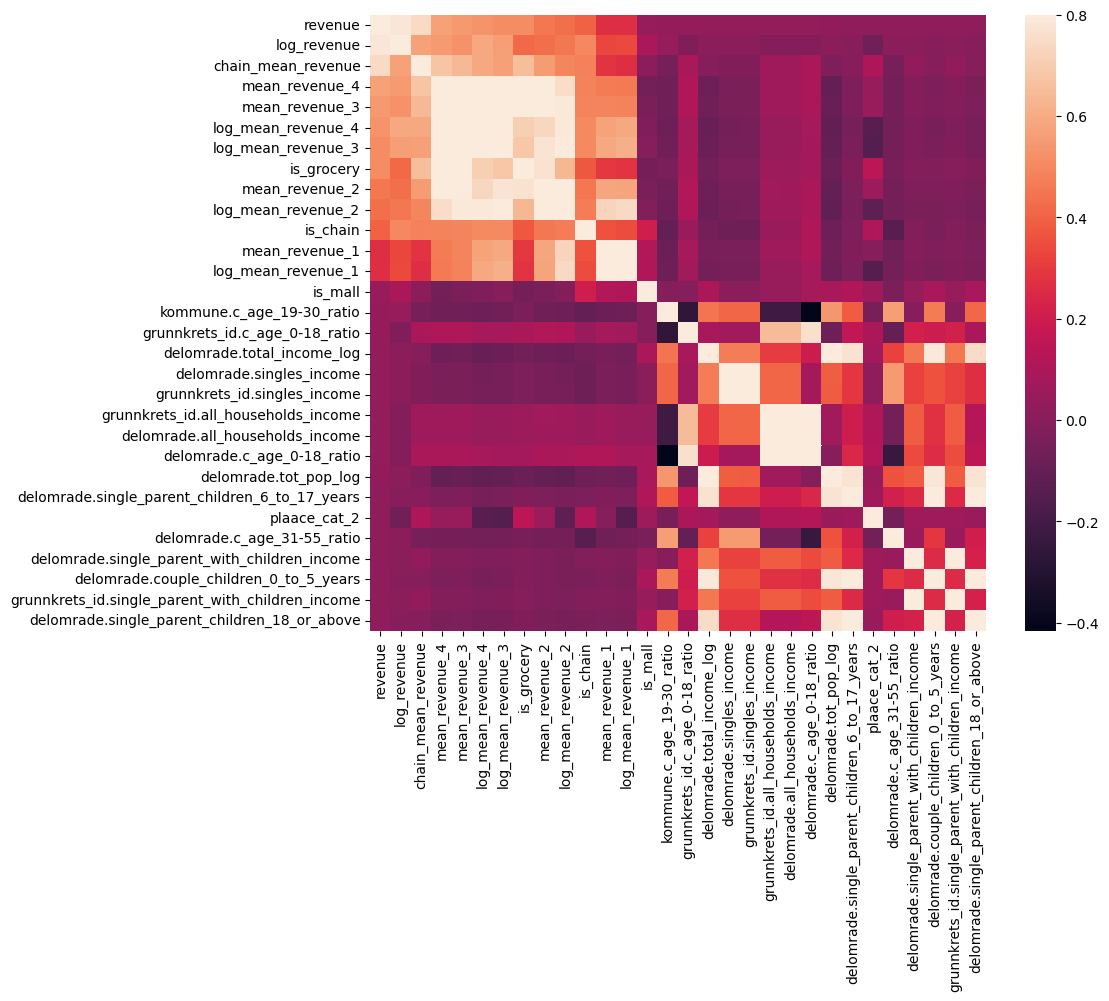

In [45]:
k = 30 #number of variables for heatmap
cols = corrmat.nlargest(k, 'revenue')['revenue'].index
#new correlation matrix
corrmat = stores_train[cols].corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

## Log Revenues

In [6]:
train_num = stores_train.select_dtypes(include=[np.float64, np.int64])

In [7]:
train_num.shape

(10287, 269)

In [13]:
train_num.plot(kind="box", subplots=True, layout=(17,16), figsize=(100,100));

In [85]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from utils import CustomTransformer

In [86]:
numerical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="mean")), 
        ("scaler", StandardScaler(with_mean=True, with_std=True))]
)

In [87]:
train_num_sd = numerical_transformer.fit_transform(train_num)

In [88]:
train_num_sd = pd.DataFrame(train_num_sd, index=train_num.index, columns=train_num.columns)

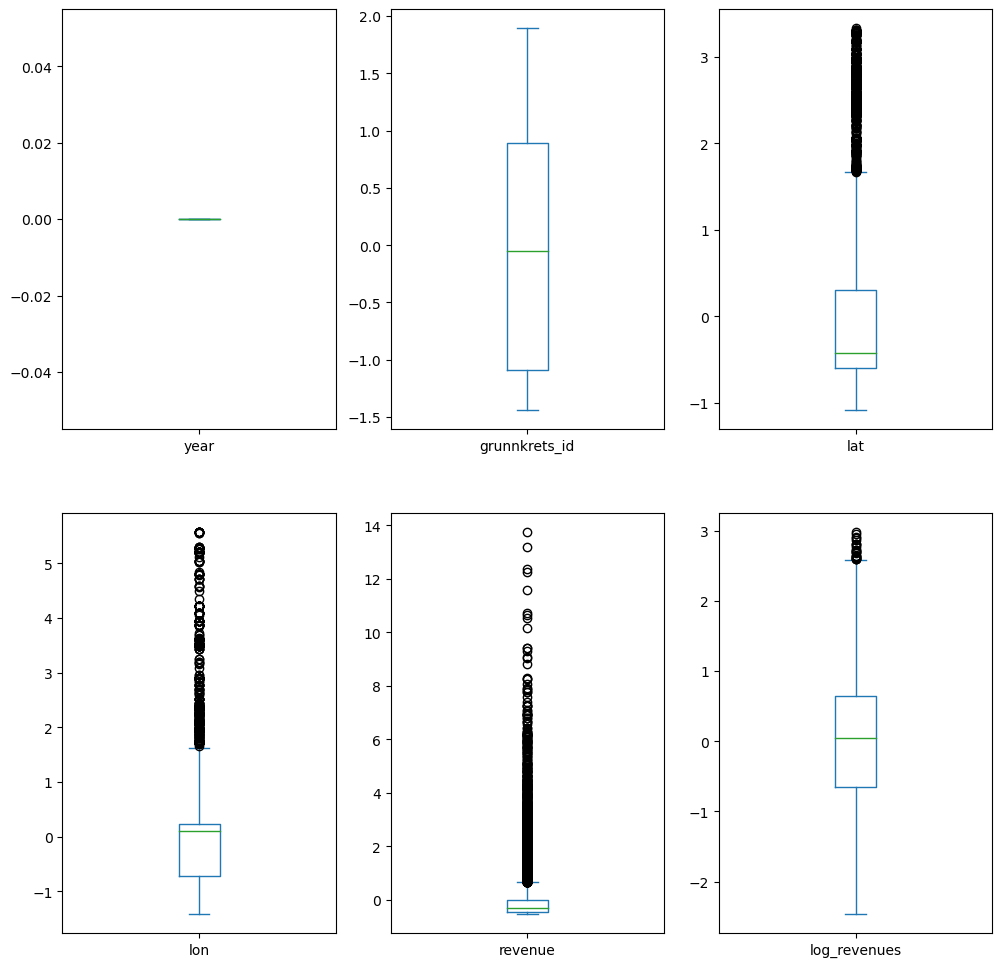

In [89]:
train_num_sd.plot(kind="box", subplots=True, layout=(2,3), figsize=(12,12));

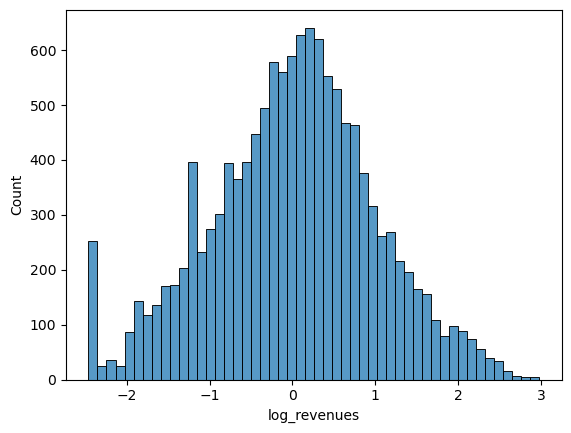

In [90]:
sns.histplot(train_num_sd.log_revenues);

In [91]:
import numpy as np
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

sample_outliers = detect_outliers_zscore(train_num.revenue)
print("# of utliers from Z-scores method: ", len(sample_outliers))

# of utliers from Z-scores method:  328


In [92]:
stores_test = pd.read_csv("data/stores_test.csv")

In [94]:
stores_train.revenue.value_counts()

0.000     217
0.500     187
1.000      55
10.000     34
0.125      21
         ... 
66.367      1
16.966      1
4.335       1
18.750      1
2.328       1
Name: revenue, Length: 7971, dtype: int64

In [143]:
top_n = 500
least_revenue = stores_train.sort_values(by=["revenue"], ascending=True).head(top_n)
most_revenue = stores_train.sort_values(by=["revenue"], ascending=False).head(top_n)
random_revenue = stores_train.sample(top_n)

## Check geographical location

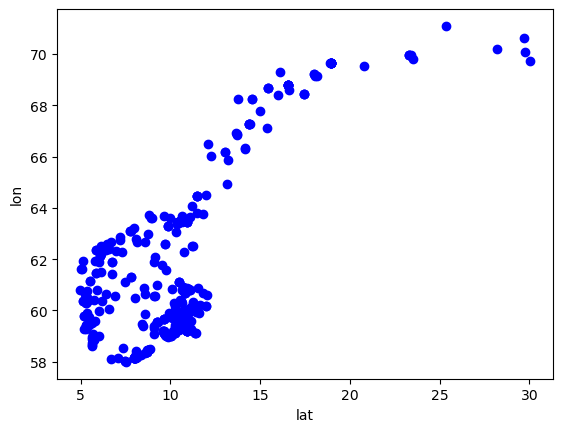

In [144]:
plt.plot(random_revenue["lon"], random_revenue["lat"], "bo")
plt.ylabel("lon")
plt.xlabel("lat")
plt.show();

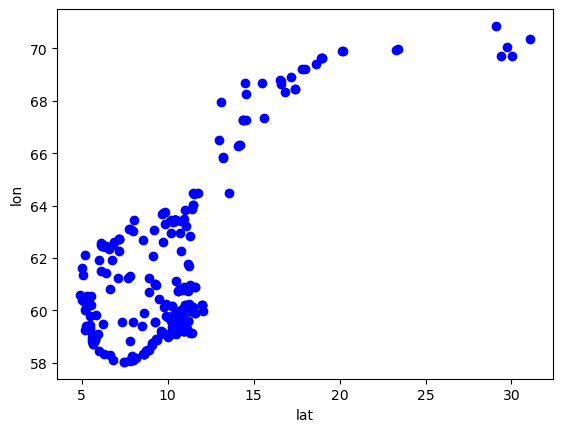

In [145]:
plt.plot(least_revenue["lon"], least_revenue["lat"], "bo")
plt.ylabel("lon")
plt.xlabel("lat")
plt.show();

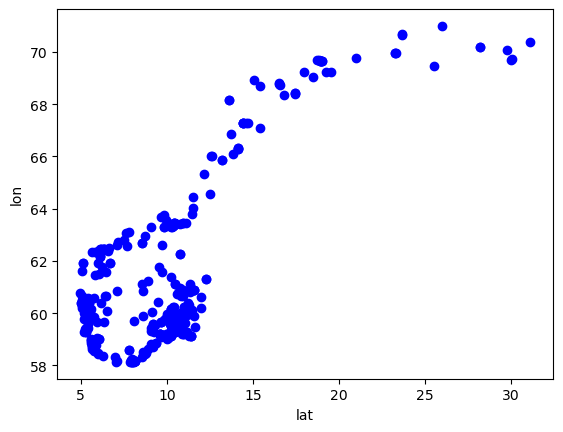

In [146]:
plt.plot(most_revenue["lon"], most_revenue["lat"], "bo")
plt.ylabel("lon")
plt.xlabel("lat")
plt.show();

## Check distribution of categories

In [170]:
def create_pie_chart(df_column, top_n = 10):
    df_col_dict = dict(df_column.value_counts())
    df_col_labels = list(df_col_dict.keys())
    df_col_values = list(df_col_dict.values())
    new_df_col_labels = df_col_labels[:top_n]
    new_df_col_labels.append("Other")
    new_df_col_values = df_col_values[:top_n]
    new_df_col_values.append(sum(df_col_values[top_n:]))
    plt.pie(new_df_col_values, labels = new_df_col_labels, autopct='%.0f%%')
    plt.show()

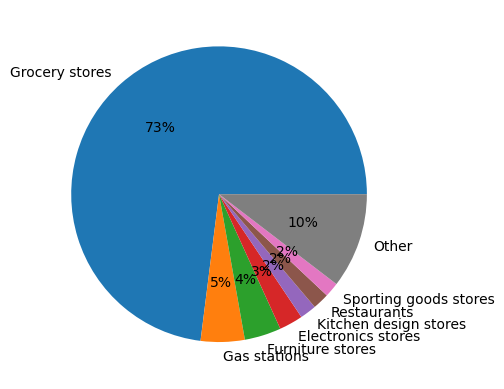

In [171]:
create_pie_chart(most_revenue.sales_channel_name, top_n=7)

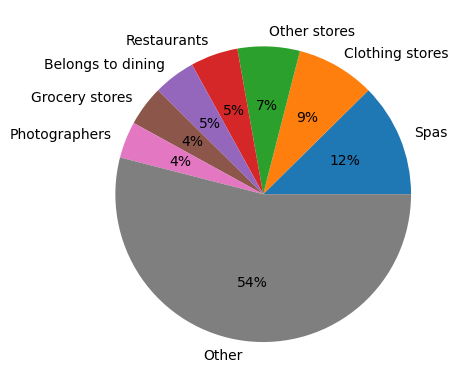

In [169]:
create_pie_chart(least_revenue.sales_channel_name, top_n=7)

In [152]:
zero_rev_stores = stores_train[stores_train["revenue"] == 0]

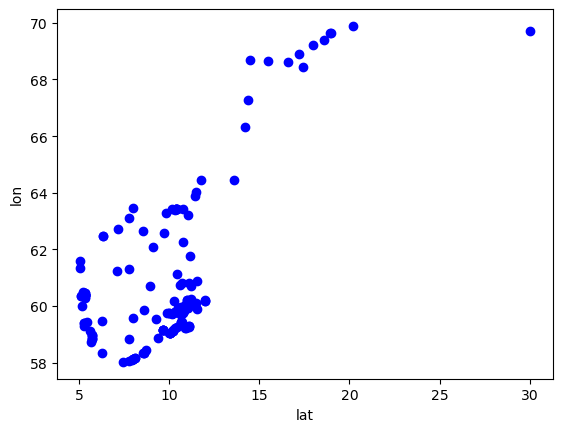

In [154]:
plt.plot(zero_rev_stores["lon"], zero_rev_stores["lat"], "bo")
plt.ylabel("lon")
plt.xlabel("lat")
plt.show();

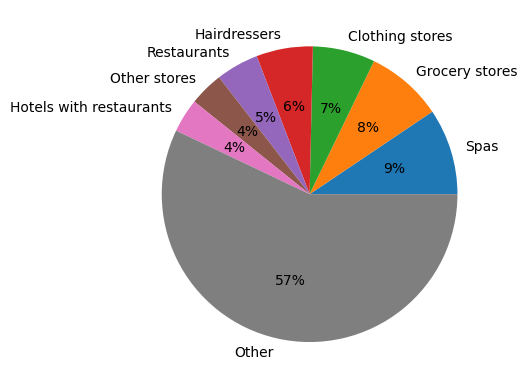

In [172]:
create_pie_chart(stores_train.sales_channel_name, top_n=7)

## Remove Outliers

In [47]:
stores_train.revenue.describe()

count    10287.000000
mean         8.328546
std         15.659131
min          0.000000
25%          1.188000
50%          3.363000
75%          8.052500
max        219.599000
Name: revenue, dtype: float64

We should remove stores with 0 revenue (does not make sense)

In [79]:
small_rev = stores_train[(stores_train["revenue"] < 20) & (stores_train["revenue"] > 0.00)]

In [80]:
small_rev[["store_name", "revenue", "chain_mean_revenue", "mean_revenue_4"]]

,store_name,revenue,chain_mean_revenue,mean_revenue_4
2506,BAKER KLAUSEN UNION,4.447,4.749203,5.448447
12305,PRIKKEN RENS AS,2.040,4.749203,2.971692
8561,INVIT AS,5.739,4.749203,6.400961
818,MUCHO MAS,15.573,4.749203,8.389096
10553,WHITE GALLERY AS,2.456,4.749203,1.933092
...,...,...,...,...
4859,ILONA AS,2.351,4.749203,4.652183
3264,FARGERIKE REINAAS,8.820,11.599725,8.585576
9845,NEXT FRISØR ÅLESUND,0.458,4.749203,2.632742
10799,HELSE OG VELVÆRE,0.592,4.749203,1.933092


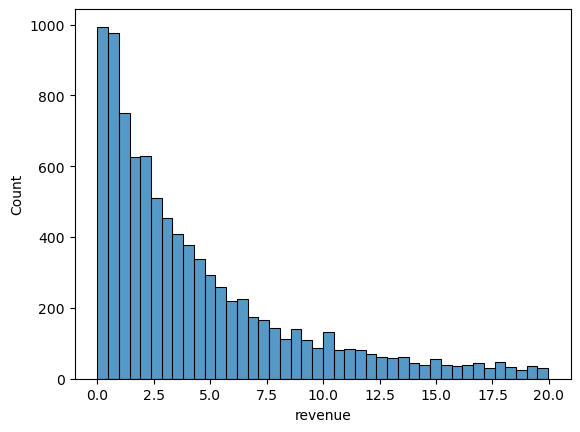

In [83]:
sns.histplot(small_rev.revenue);

In [90]:
from outlier_utils import remove_low_revenue

stores_train = remove_low_revenue(stores_train)

In [91]:
stores_train.shape

(10043, 282)